# Jupyter Notebook for Compiling The University of Alabama Thesis Chemical Structure Data

### Vincent F. Scalfani

In [4]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole

from rdkit.Chem import PandasTools
#PandasTools.RenderImagesInAllDataFrames(images=True)

from rdkit.Chem import Draw
from rdkit import DataStructs
import numpy
import pandas as pd
import os # for changing directories

import rdkit
rdkit.__version__

'2019.09.2'

In [5]:
# Many thanks to Chris Swain's tutorial linked below, which helped me adapt the 
# the code for the thesis indexing project:
# https://www.macinchem.org/reviews/molsimilar/SimilarMyMolecules.html

In [6]:
# Import the thesis chemical structure data

# The file names are in the format:
# year_author_UACatalogAccession#_substances_raw.csv (e.g.,2000_Han_M_UA.1130335_substances_raw.csv)

# The format of the data within the file is as follows:

# SMILES_CHEMAXON_19.27.0	DATASOURCE_REGID	SUBSTANCE_SYNONYM	SUBSTANCE_COMMENT	SUBSTANCE_URL	INCHIKEY_1.05_CHEMAXON_19.27.0
# CN(CCO)C1=CC(=O)C(=CC1=O)N(C)CCO	UALIB-993	2,5-Bis(N-2-hydroxyethyl-N-methylamino)-1,4-benzoquinone	Han, M. Synthesis and characterization of amine-quinone polymides and their uses in corrosion protection. Ph.D. Thesis, The University of Alabama, 2000.	http://library.ua.edu/vwebv/holdingsInfo?bibId=1130335	RQFHZLBSLFXBFM-UHFFFAOYSA-N
# CCN(CCO)C1=CC(=O)C(=CC1=O)N(CC)CCO	UALIB-994	2,5-Bis(N-2-hydroxyethyl-N-ethylamino)-1,4-benzoquinone	Han, M. Synthesis and characterization of amine-quinone polymides and their uses in corrosion protection. Ph.D. Thesis, The University of Alabama, 2000.	http://library.ua.edu/vwebv/holdingsInfo?bibId=1130335	CANMGMCDOLOYIX-UHFFFAOYSA-N
# CCCN(CCO)C1=CC(=O)C(=CC1=O)N(CCC)CCO	UALIB-995	2,5-Bis(N-2-hydroxyethyl-N-propylamino)-1,4-benzoquinone	Han, M. Synthesis and characterization of amine-quinone polymides and their uses in corrosion protection. Ph.D. Thesis, The University of Alabama, 2000.	http://library.ua.edu/vwebv/holdingsInfo?bibId=1130335	LVAXIIRCIYEGNR-UHFFFAOYSA-N
# ... snip ...

os.chdir('/UALIB_ChemStructures/StructureData/raw/CSV')

file_name_raw = '2008_Carrick_JD_UA.2634576_substances_raw.csv' # change this line each time, that's it. 
thesis_df = pd.read_csv(file_name_raw, sep = '\t')

# view first 10 rows
thesis_df.head(10)

,SMILES_CHEMAXON_19.27.0,DATASOURCE_REGID,THESIS_SUBSTANCE_NUMBER,SUBSTANCE_COMMENT,SUBSTANCE_URL,INCHIKEY_1.05_CHEMAXON_19.27.0
0,CC(C)[C@@H]1N(C(C)=O)C(=S)OC1(C1=CC=CC=C1)C1=C...,UALIB-1365,130,"Carrick, J.D. Progress towards the formal enan...",http://library.ua.edu/vwebv/holdingsInfo?bibId...,WJCFTHCUULIELA-SFHVURJKSA-N
1,C\C=C\[C@@H](O)CC(=O)N1[C@@H](C(C)C)C(OC1=S)(C...,UALIB-1366,131 (dr mix),"Carrick, J.D. Progress towards the formal enan...",http://library.ua.edu/vwebv/holdingsInfo?bibId...,QQOBNOHBJKDMJC-OMRCQCICSA-N
2,CON(C)C(=O)C[C@@H](O)\C=C\C,UALIB-1367,116,"Carrick, J.D. Progress towards the formal enan...",http://library.ua.edu/vwebv/holdingsInfo?bibId...,DSWIXUSDPPJEOC-KPJROHGDSA-N
3,[H]C1(C)CC1([H])[C@H](O)CC(=O)N(C)OC,UALIB-1368,132 (dr mix),"Carrick, J.D. Progress towards the formal enan...",http://library.ua.edu/vwebv/holdingsInfo?bibId...,WHVPIFDYYSOYBG-KAVNDROISA-N
4,[H][C@@]1(C)C[C@@]1([H])[C@@H](CC(=O)N(C)OC)O[...,UALIB-1369,133A,"Carrick, J.D. Progress towards the formal enan...",http://library.ua.edu/vwebv/holdingsInfo?bibId...,FRVDEICOJCZUFB-MGPQQGTHSA-N
5,[H][C@@]1(C)C[C@@]1([H])[C@@H](CC(=O)CC=C)O[Si...,UALIB-1370,133,"Carrick, J.D. Progress towards the formal enan...",http://library.ua.edu/vwebv/holdingsInfo?bibId...,AXLLFBBYRBIEPN-FVQBIDKESA-N
6,[H][C@@]1(C)C[C@@]1([H])[C@H](O)CC(=O)CC=C,UALIB-1371,115,"Carrick, J.D. Progress towards the formal enan...",http://library.ua.edu/vwebv/holdingsInfo?bibId...,QXQFMMJRVVXCFR-SZEHBUNVSA-N
7,[H][C@@]1(C)C[C@@]1([H])[C@H](O)C[C@@H](O)CC=C...,UALIB-1372,135A (dr mix),"Carrick, J.D. Progress towards the formal enan...",http://library.ua.edu/vwebv/holdingsInfo?bibId...,UNBWIWBZGVAURB-RTIDEPAHSA-N
8,[H][C@@]1(C)C[C@@]1([H])[C@H]1C[C@H](CC=C)OC(C...,UALIB-1373,135,"Carrick, J.D. Progress towards the formal enan...",http://library.ua.edu/vwebv/holdingsInfo?bibId...,ANTVOXRDPKQAPQ-WRWGMCAJSA-N
9,[H]C(=O)C[C@H]1C[C@@H](OC(C)(C)O1)[C@]1([H])C[...,UALIB-1374,114,"Carrick, J.D. Progress towards the formal enan...",http://library.ua.edu/vwebv/holdingsInfo?bibId...,NLUBCXAVKKVFRZ-LMLFDSFASA-N


In [7]:
# Add RDKit Molecular Objects
PandasTools.AddMoleculeColumnToFrame(thesis_df,'SMILES_CHEMAXON_19.27.0','RDMol', includeFingerprints=False)
print([str(x) for x in  thesis_df.columns])

['SMILES_CHEMAXON_19.27.0', 'DATASOURCE_REGID', 'THESIS_SUBSTANCE_NUMBER', 'SUBSTANCE_COMMENT', 'SUBSTANCE_URL', 'INCHIKEY_1.05_CHEMAXON_19.27.0', 'RDMol']


,RDMol,DATASOURCE_REGID,SMILES_CHEMAXON_19.27.0,THESIS_SUBSTANCE_NUMBER,SUBSTANCE_COMMENT,SUBSTANCE_URL,INCHIKEY_1.05_CHEMAXON_19.27.0
0,,UALIB-1365,CC(C)[C@@H]1N(C(C)=O)C(=S)OC1(C1=CC=CC=C1)C1=CC=CC=C1,130,"Carrick, J.D. Progress towards the formal enantioselective total synthesis of (-)-clavosolide A. Ph.D. Thesis, The University of Alabama, 2008.",http://library.ua.edu/vwebv/holdingsInfo?bibId=2634576,WJCFTHCUULIELA-SFHVURJKSA-N
1,,UALIB-1366,C\C=C\[C@@H](O)CC(=O)N1[C@@H](C(C)C)C(OC1=S)(C1=CC=CC=C1)C1=CC=CC=C1.C\C=C\[C@H](O)CC(=O)N1[C@@H](C(C)C)C(OC1=S)(C1=CC=CC=C1)C1=CC=CC=C1,131 (dr mix),"Carrick, J.D. Progress towards the formal enantioselective total synthesis of (-)-clavosolide A. Ph.D. Thesis, The University of Alabama, 2008.",http://library.ua.edu/vwebv/holdingsInfo?bibId=2634576,QQOBNOHBJKDMJC-OMRCQCICSA-N
2,,UALIB-1367,CON(C)C(=O)C[C@@H](O)\C=C\C,116,"Carrick, J.D. Progress towards the formal enantioselective total synthesis of (-)-clavosolide A. Ph.D. Thesis, The University of Alabama, 2008.",http://library.ua.edu/vwebv/holdingsInfo?bibId=2634576,DSWIXUSDPPJEOC-KPJROHGDSA-N
3,,UALIB-1368,[H]C1(C)CC1([H])[C@H](O)CC(=O)N(C)OC,132 (dr mix),"Carrick, J.D. Progress towards the formal enantioselective total synthesis of (-)-clavosolide A. Ph.D. Thesis, The University of Alabama, 2008.",http://library.ua.edu/vwebv/holdingsInfo?bibId=2634576,WHVPIFDYYSOYBG-KAVNDROISA-N
4,,UALIB-1369,[H][C@@]1(C)C[C@@]1([H])[C@@H](CC(=O)N(C)OC)O[Si](CC)(CC)CC,133A,"Carrick, J.D. Progress towards the formal enantioselective total synthesis of (-)-clavosolide A. Ph.D. Thesis, The University of Alabama, 2008.",http://library.ua.edu/vwebv/holdingsInfo?bibId=2634576,FRVDEICOJCZUFB-MGPQQGTHSA-N
5,,UALIB-1370,[H][C@@]1(C)C[C@@]1([H])[C@@H](CC(=O)CC=C)O[Si](CC)(CC)CC,133,"Carrick, J.D. Progress towards the formal enantioselective total synthesis of (-)-clavosolide A. Ph.D. Thesis, The University of Alabama, 2008.",http://library.ua.edu/vwebv/holdingsInfo?bibId=2634576,AXLLFBBYRBIEPN-FVQBIDKESA-N
6,,UALIB-1371,[H][C@@]1(C)C[C@@]1([H])[C@H](O)CC(=O)CC=C,115,"Carrick, J.D. Progress towards the formal enantioselective total synthesis of (-)-clavosolide A. Ph.D. Thesis, The University of Alabama, 2008.",http://library.ua.edu/vwebv/holdingsInfo?bibId=2634576,QXQFMMJRVVXCFR-SZEHBUNVSA-N
7,,UALIB-1372,[H][C@@]1(C)C[C@@]1([H])[C@H](O)C[C@@H](O)CC=C.[H][C@@]1(C)C[C@@]1([H])[C@H](O)C[C@H](O)CC=C,135A (dr mix),"Carrick, J.D. Progress towards the formal enantioselective total synthesis of (-)-clavosolide A. Ph.D. Thesis, The University of Alabama, 2008.",http://library.ua.edu/vwebv/holdingsInfo?bibId=2634576,UNBWIWBZGVAURB-RTIDEPAHSA-N
8,,UALIB-1373,[H][C@@]1(C)C[C@@]1([H])[C@H]1C[C@H](CC=C)OC(C)(C)O1,135,"Carrick, J.D. Progress towards the formal enantioselective total synthesis of (-)-clavosolide A. Ph.D. Thesis, The University of Alabama, 2008.",http://library.ua.edu/vwebv/holdingsInfo?bibId=2634576,ANTVOXRDPKQAPQ-WRWGMCAJSA-N
9,,UALIB-1374,[H]C(=O)C[C@H]1C[C@@H](OC(C)(C)O1)[C@]1([H])C[C@@]1([H])C,114,"Carrick, J.D. Progress towards the formal enantioselective total synthesis of (-)-clavosolide A. Ph.D. Thesis, The University of Alabama, 2008.",http://library.ua.edu/vwebv/holdingsInfo?bibId=2634576,NLUBCXAVKKVFRZ-LMLFDSFASA-N

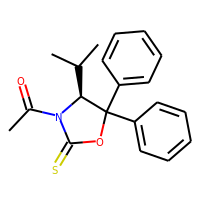
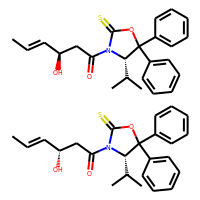
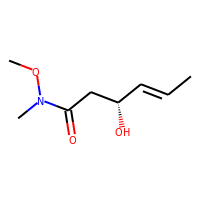
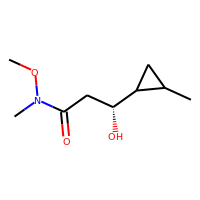
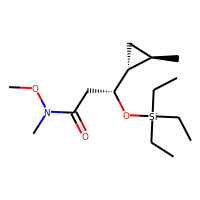
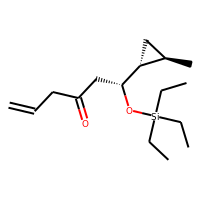
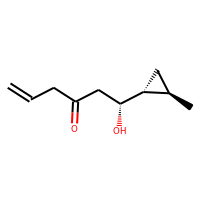
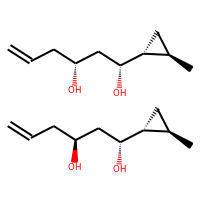
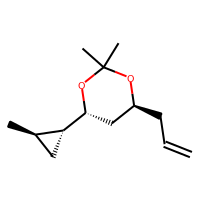
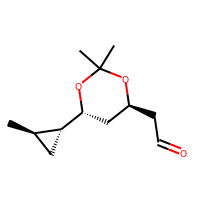
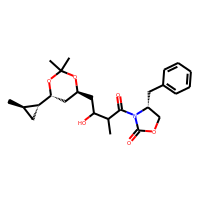
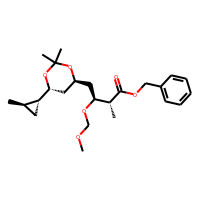
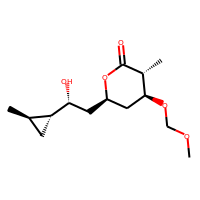
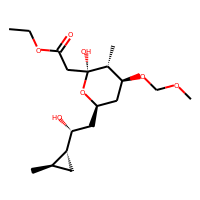
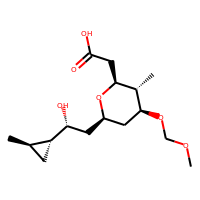
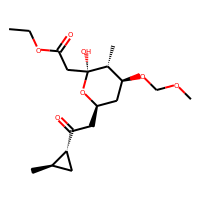
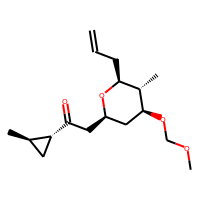
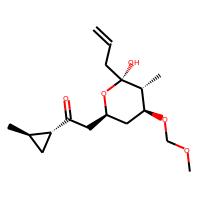
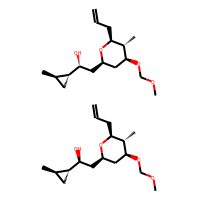
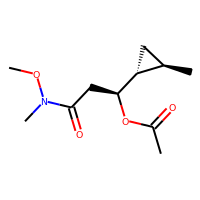
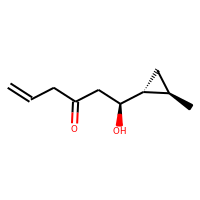
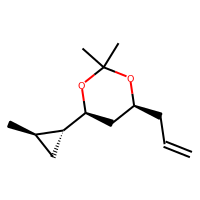
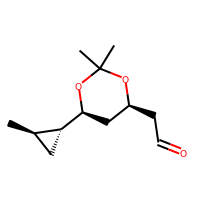
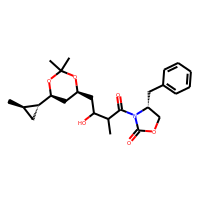
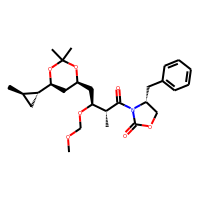
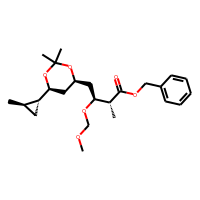
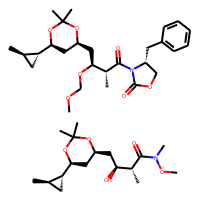
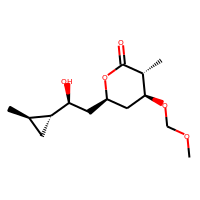
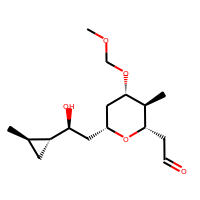
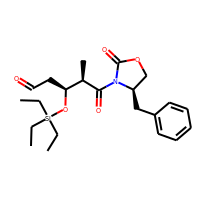
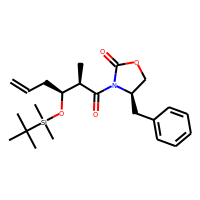
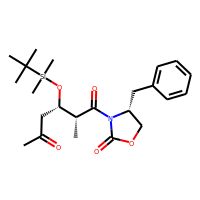
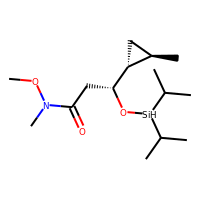
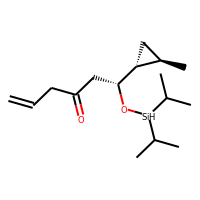
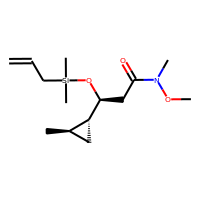
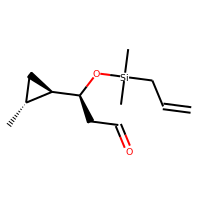

In [8]:
# rearrange table order
thesis_df = thesis_df[['RDMol',
 'DATASOURCE_REGID',
 'SMILES_CHEMAXON_19.27.0',
 'THESIS_SUBSTANCE_NUMBER',
 'SUBSTANCE_COMMENT',
 'SUBSTANCE_URL',
 'INCHIKEY_1.05_CHEMAXON_19.27.0']]

# Display table
# thesis_df
# fixes mol display in dataframes (RDKit Issue# 2673)
from IPython.display import HTML;HTML(thesis_df.head(len(thesis_df.index)).to_html()) 

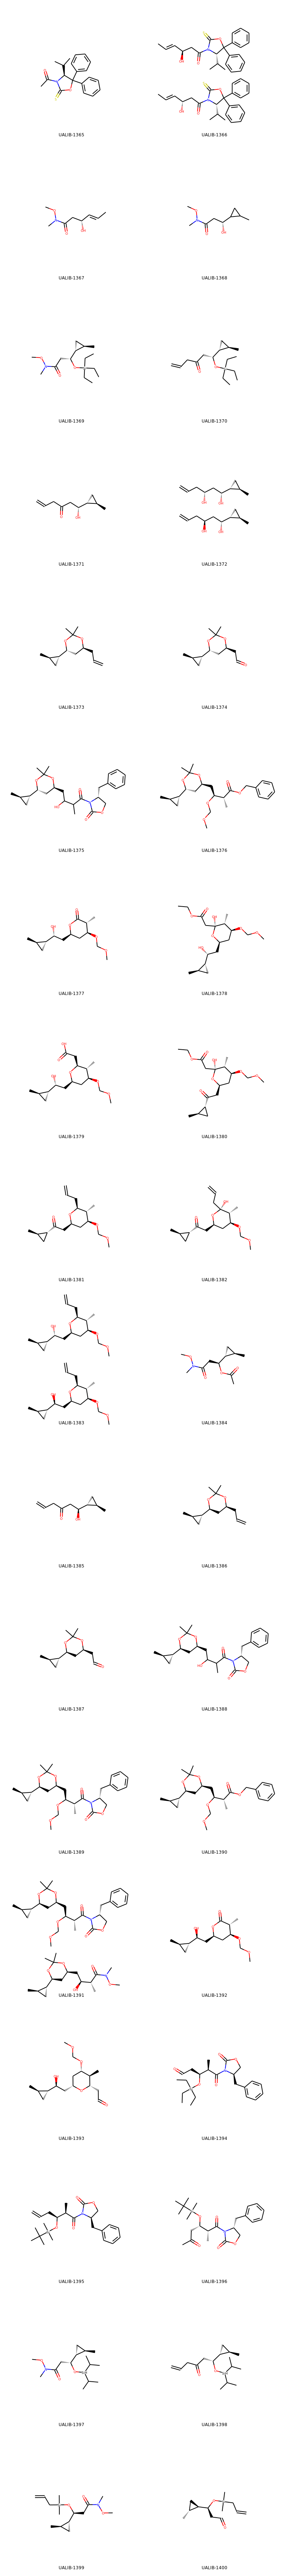

In [9]:
# we can also display just the molecules like this:
PandasTools.FrameToGridImage(thesis_df,column= 'RDMol', molsPerRow=2,subImgSize=(400,400),legendsCol="DATASOURCE_REGID")

In [10]:
# Now we need to caluclate the InChIs from RDKit and add to thesis_df
# These are InChI 1.05 as computed by RDKit 2019.09.2 release.

inchi_list = []
for mol in thesis_df['RDMol']:
    inchi = Chem.MolToInchi(mol)
    inchi_list.append(inchi)

# add to dataframe
thesis_df['INCHI_1.05_RDKIT_2019.09.2']=inchi_list

In [11]:
# Repeat for RDKit InChIKey
# These are InChI 1.05 as computed by RDKit 2019.09.2 release.
ik_list = []
for mol in thesis_df['RDMol']:
    ik = Chem.MolToInchiKey(mol)
    ik_list.append(ik)
       
# add to dataframe
thesis_df['INCHIKEY_1.05_RDKIT_2019.09.2']=ik_list

In [12]:
# Repeat for RDKit SMILES, write kekulized SMILES
# SMILES are from RDKit 2019.09.2 release.

smiles_list = []
for mol in thesis_df['RDMol']:
    Chem.Kekulize(mol)
    smiles = Chem.MolToSmiles(mol,kekuleSmiles=True)
    smiles_list.append(smiles)

# add to dataframe
thesis_df['SMILES_RDKIT_2019.09.2']=smiles_list

In [13]:
# Export the SDF for PubChem upload

# create the file name
file_name_sdf = file_name_raw.replace('raw.csv','rdkit2019092.sdf')

# cd
os.chdir('/UALIB_ChemStructures/StructureData/rdkit_processed_sdf')


PandasTools.WriteSDF(thesis_df,file_name_sdf, molColName='RDMol', 
    properties=['DATASOURCE_REGID',
                'SMILES_RDKIT_2019.09.2',
                'INCHI_1.05_RDKIT_2019.09.2',
                'SUBSTANCE_COMMENT',
                'SUBSTANCE_URL'])

In [14]:
# Export to csv (tab seperated) without RDKit mol object image

# create the file name
file_name_csv = file_name_raw.replace('raw.csv','rdkit2019092.csv')

sel_cols = ['DATASOURCE_REGID',
                'SMILES_RDKIT_2019.09.2',
                'THESIS_SUBSTANCE_NUMBER',
                'SUBSTANCE_COMMENT',
                'SUBSTANCE_URL',
                'INCHI_1.05_RDKIT_2019.09.2',
                'INCHIKEY_1.05_RDKIT_2019.09.2',
                'INCHIKEY_1.05_CHEMAXON_19.27.0',
                'SMILES_CHEMAXON_19.27.0']

# cd
os.chdir('/UALIB_ChemStructures/StructureData/rdkit_processed_csv')

thesis_df.to_csv(file_name_csv, sep ='\t', index=False, columns = sel_cols)